# Machine Learning: Classification

This report highlights the steps taken to build several machine learning models and then compares the accuracy of each model. The goal is to build four classification models:
* Support Vector Machine
* K Nearest Neighbours
* Decision Trees
* Logistic Regression

These models will classify mushrooms as either edible or poisonous. The ideal model will accurately classify all poisonous mushrooms as a misclassification can be life threatening.


## The data

This dataset includes hypothetical observations that correspond to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. This dataset was drawn from The Audubon Society Field Guide to North American Mushrooms (1981), and obtained from [kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. 





## Data Attributes

The Attributes below describe the content in each column in the dataset:

* class: edible=e, poisonous=p

* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

* cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

* bruises: bruises=t, no=f

* odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

* gill-attachment: attached=a, descending=d, free=f, notched=n

* gill-spacing: close=c, crowded=w, distant=d

* gill-size: broad=b, narrow=n

* gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

* stalk-shape: enlarging=e, tapering=t

* stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* veil-type: partial=p, universal=u

* veil-color: brown=n, orange=o, white=w, yellow=y

* ring-number: none=n, one=o, two=t

* ring-type: cobwebby=c ,evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

* spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [16]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [17]:
# load the data
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [94]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [95]:
# determine if the data set is balanced
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Text(0, 0.5, 'count')

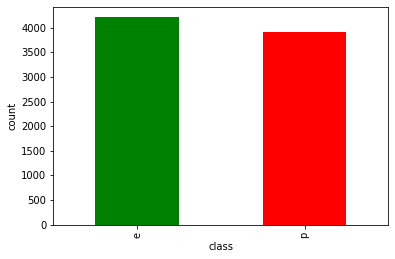

In [102]:
ax = df['class'].value_counts().plot.bar(color=['green', 'red'])
ax.set_xlabel('class')
ax.set_ylabel('count')

In [5]:
enc = LabelEncoder()
df['class'] = enc.fit_transform(df['class'])

cols = [x for x in df.columns if x != 'class']
enc_features= pd.get_dummies(df[cols])

ml_df = pd.concat([df['class'],enc_features ], axis = 1)
ml_df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Machine Learning

As mentioned above, the goal is to build several classification models that will correctly classify whether a mushroom is edible (class 0) or poisonous (class 1). The goal here is to accurately classify poisonous mushrooms and as such, we want our recall value to be as high as possible. We are not as concerned about the precision of the model since classifying edible mushrooms as poisonous is not as important. However, misclassifying poisonous mushrooms can be life threatening.
The four models below were built:
*	Support Vector Machine
*	K Nearest Neighbours
*	Decision Trees
*	Logistic Regression

These model types were selected because they make predictions using different algorithms and as a result, one model may be more suited to this classification problem than the others. As a misclassification of a poisonous mushroom can be life threatening, it is important to deploy the model that can most accurately classify the mushrooms.

As the dataset contained only text entries, the entire dataset had to be OneHotEncoded leading to a binary dataset. The data was then split into a training and testing set to train and test each model respectively.  


First we did to detemine if the dataset is balanced. To do this, we will determine how many observations belong to each class.

Next, we define our features and target variables

In [52]:
# define the features
features = [x for x in ml_df.columns if x != 'class']
X = ml_df[features]
# define the target
y = ml_df['class']

Next, we split our data into a training and testing set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [19]:
from sklearn.metrics import classification_report, accuracy_score,precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix,precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [88]:
def model_results(X_train, X_test, y_train, y_test, model):
    scores = {}
    if model == 'logreg': #for logistic regression
        param_grid = [{'penalty' : ['l1,' 'l2',]},
                      {'C':[0.01, 0.1, 1]}]
        
        lr = LogisticRegression(random_state=123
                                ,max_iter = 1000
        grid = GridSearchCV(estimator = lr,
                            param_grid = param_grid,
                            scoring = 'f1',
                            cv= 4,
                            verbose = 0)
        grid.fit(X_train, y_train)
        yhat = grid.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        
        precision, recall, f_beta, support = precision_recall_fscore_support(y_test,
                                            yhat, beta=5, pos_label=1, average='binary')
        
        scores['model'] = model
        scores['accuracy'] = accuracy
        scores['precision'] = precision
        scores['recall'] = recall
        scores['f1_score'] = f_beta
        
        matrix = confusion_matrix(y_test, yhat)
        
        #return matrix
        ax = sns.heatmap(matrix, annot=True)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values')
                       
        return pd.Series(scores), plt.show()   
    
    
    elif model == 'Decision Tree': # for decision tree
        param_grid = [{'max_depth': range(1,10)},
                      {'max_features': range(1,10)}]
        
        decison_tree = DecisionTreeClassifier(random_state=123
                                )
        grid = GridSearchCV(estimator = decison_tree,
                            param_grid = param_grid,
                            scoring = 'f1',
                            cv= 4,
                            verbose = 0)
        grid.fit(X_train, y_train)
        yhat = grid.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        
        precision, recall, f_beta, support = precision_recall_fscore_support(y_test,
                                            yhat, beta=5, pos_label=1, average='binary')
        
        scores['model'] = model
        scores['accuracy'] = accuracy
        scores['precision'] = precision
        scores['recall'] = recall
        scores['f1_score'] = f_beta
        
        matrix = confusion_matrix(y_test, yhat)
        
        #return matrix
        ax = sns.heatmap(matrix, annot=True)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values')
                       
        return pd.Series(scores), plt.show() 
    
    elif model == 'SVM': # for support vector machines
        param_grid = [{'kernel': ['rbf', 'sigmoid', 'linear']},
                      {'C': [0.001, 0.01, 0.1, 1,10, 100]}]
        
        support_vect = svm.SVC(random_state=123)
        
        grid = GridSearchCV(estimator = support_vect,
                            param_grid = param_grid,
                            scoring = 'f1',
                            cv= 4,
                            verbose = 0)
        grid.fit(X_train, y_train)
        yhat = grid.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        
        precision, recall, f_beta, support = precision_recall_fscore_support(y_test,
                                            yhat, beta=5, pos_label=1, average='binary')
        
        scores['model'] = model
        scores['accuracy'] = accuracy
        scores['precision'] = precision
        scores['recall'] = recall
        scores['f1_score'] = f_beta
        
        matrix = confusion_matrix(y_test, yhat)
        
        #return matrix
        ax = sns.heatmap(matrix, annot=True)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values')
                       
        return pd.Series(scores), plt.show()   
    
    elif model == 'KNN': # for K nearest neighbours
        param_grid = [{'n_neighbors' : range(1,11)}]
        
        neigh = KNeighborsClassifier()
        
        grid = GridSearchCV(estimator = neigh,
                            param_grid = param_grid,
                            scoring = 'f1',
                            cv= 4,
                            verbose = 0)
        grid.fit(X_train, y_train)
        yhat = grid.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        
        precision, recall, f_beta, support = precision_recall_fscore_support(y_test,
                                            yhat, beta=5, pos_label=1, average='binary')
        
        scores['model'] = model
        scores['accuracy'] = accuracy
        scores['precision'] = precision
        scores['recall'] = recall
        scores['f1_score'] = f_beta
        
        matrix = confusion_matrix(y_test, yhat)
        
        #return matrix
        ax = sns.heatmap(matrix, annot=True)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values')
                       
        return pd.Series(scores), plt.show()  
        
        
        



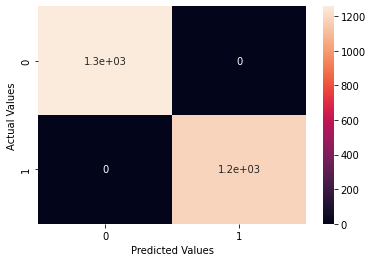

(model        Decision Tree
 accuracy               1.0
 precision              1.0
 recall                 1.0
 f1_score               1.0
 dtype: object,
 None)

In [91]:
model_results(X_train, X_test, y_train, y_test, 'Decision Tree')

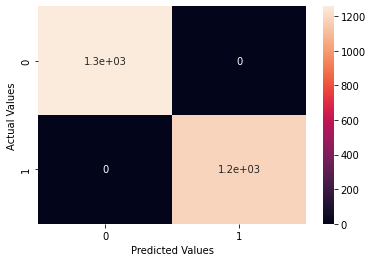

(model        SVM
 accuracy     1.0
 precision    1.0
 recall       1.0
 f1_score     1.0
 dtype: object,
 None)

In [87]:
model_results(X_train, X_test, y_train, y_test, 'SVM')

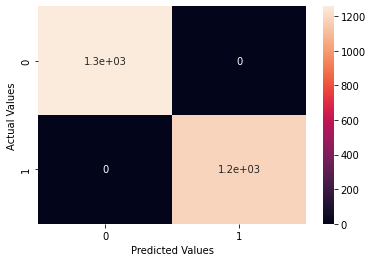

(model        KNN
 accuracy     1.0
 precision    1.0
 recall       1.0
 f1_score     1.0
 dtype: object,
 None)

In [89]:
model_results(X_train, X_test, y_train, y_test, 'KNN')

C:\Users\chuce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chuce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 28.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setti

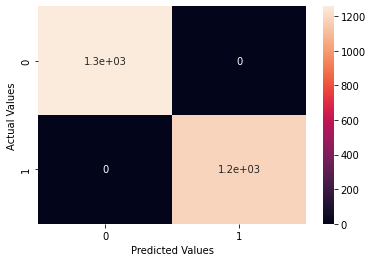

(model        logreg
 accuracy        1.0
 precision       1.0
 recall          1.0
 f1_score        1.0
 dtype: object,
 None)

In [92]:
model_results(X_train, X_test, y_train, y_test, 'logreg')

## Discussion

All four classification models returned 100% accuracy. This could be due to the varous reasons:

* The data was completely binary after performing OneHotEncoding
* Since the data was binary in nature, there were no outliers to contend with
* The models were overfitted to the training set

Each model was tuned using cross validation, which mitigated the risk of over fitting. So it is possible that the bibary nature of the data allowed each model to accuarately classify each type of mushroom.



## Conclusion

After building classification models, each model returned 100% accuracy so any of the four models can be used. With that said, the logistic regression performed the fastest; returning results in the least amount of time. Under time sensitive circumstances, the logistic regression model would be the most suited.